# LAB 7 - LQR


## Zadanie 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

import scipy.signal as sp
import numpy.linalg as nplin

from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are

### 2.1


In [2]:
R = 0.5
L = 0.5
C = 0.2

A = np.array([[0, 1], [-1 / (L * C), -R / L]])
B = np.array([[0], [1 / L]])

Q = np.array([[1, 0], [0, 1]])

R = np.array([[1]])
Q = np.array([[1, 0], [0, 1]])

P = solve_continuous_are(A, B, Q, R)

print(f"macierz P: {P}")

macierz P: [[3.42237346 0.04950976]
 [0.04950976 0.3307365 ]]


In [3]:
R_inv = nplin.inv(R)
K = R_inv @ B.transpose() @ P
print(f"macierz K: {K}")

macierz K: [[0.09901951 0.66147299]]


### 2.2


/tmp/ipython-input-2462317475.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


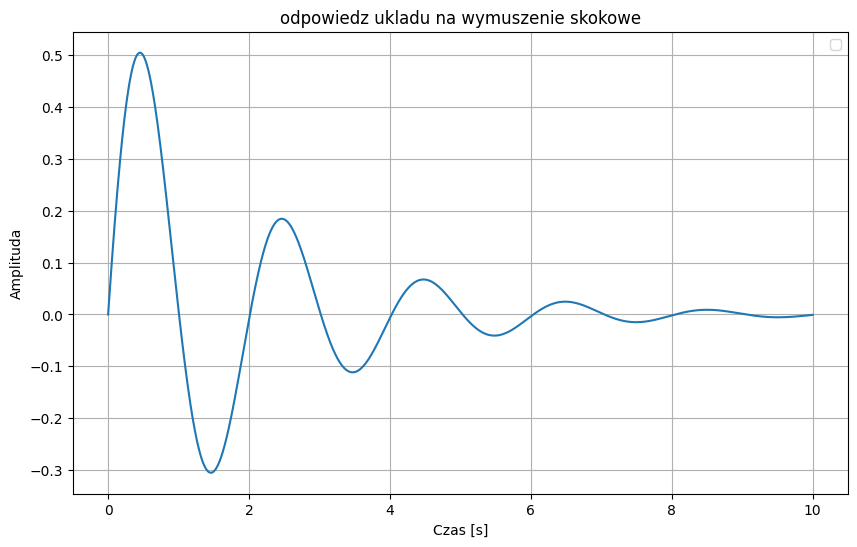

In [4]:
R = 0.5
L = 0.5
C = 0.2

A = np.array([[0, 1], [-1 / (L * C), -R / L]])
B = np.array([[0], [1 / L]])

def model(x, t):
    u = np.array([[1]])

    dxdt = A @ x + (B @ u).flatten()

    return dxdt

x0 = np.array([0, 0])
t = np.linspace(0, 10, 1000)

x_sol = odeint(model, x0, t)

plt.figure(figsize=(10, 6))
plt.plot(t, x_sol[:, 1])
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.title("odpowiedz ukladu na wymuszenie skokowe")
plt.legend()
plt.grid(True)
plt.show()

### 2.3


C:\Users\Piotr\AppData\Local\Temp\ipykernel_29044\1270155857.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


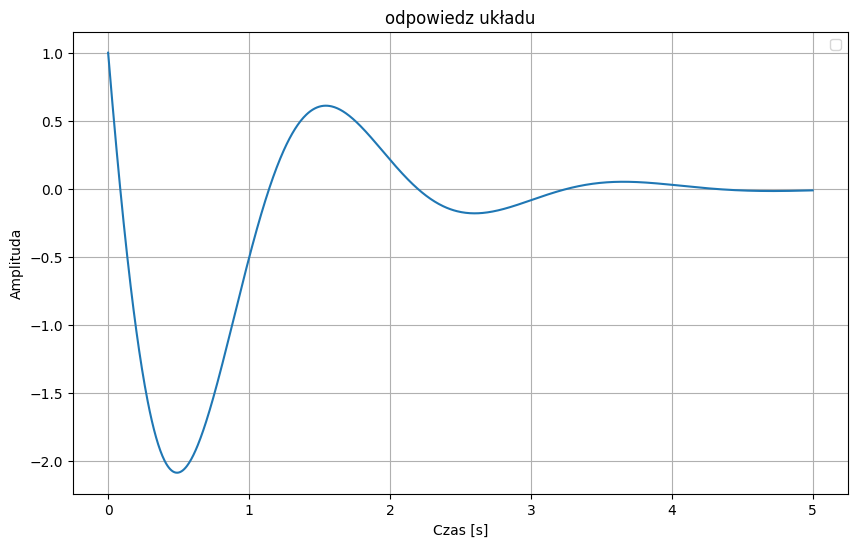

In [23]:
R = 0.5
L = 0.5
C = 0.2

A = np.array([[0, 1], [-1 / (L * C), -R / L]])
B = np.array([[0], [1 / L]])

def model(x, t, K):
    u = np.array([[1]])

    u = -K @ x

    dxdt = A @ x + (B @ u).flatten()

    return dxdt


x0 = np.array([1, 1])
t = np.linspace(0, 5, 1000)

x_sol = odeint(model, x0, t, args=(K,))

plt.figure(figsize=(10, 6))
plt.plot(t, x_sol[:, 1])
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.title("odpowiedz układu")
plt.legend()
plt.grid(True)
plt.show()

zbadac wplyw macieryz Q i R


do sprawozdania


Wyznaczona macierz wzmocnienia K: [[0.09901951 0.66147299]]


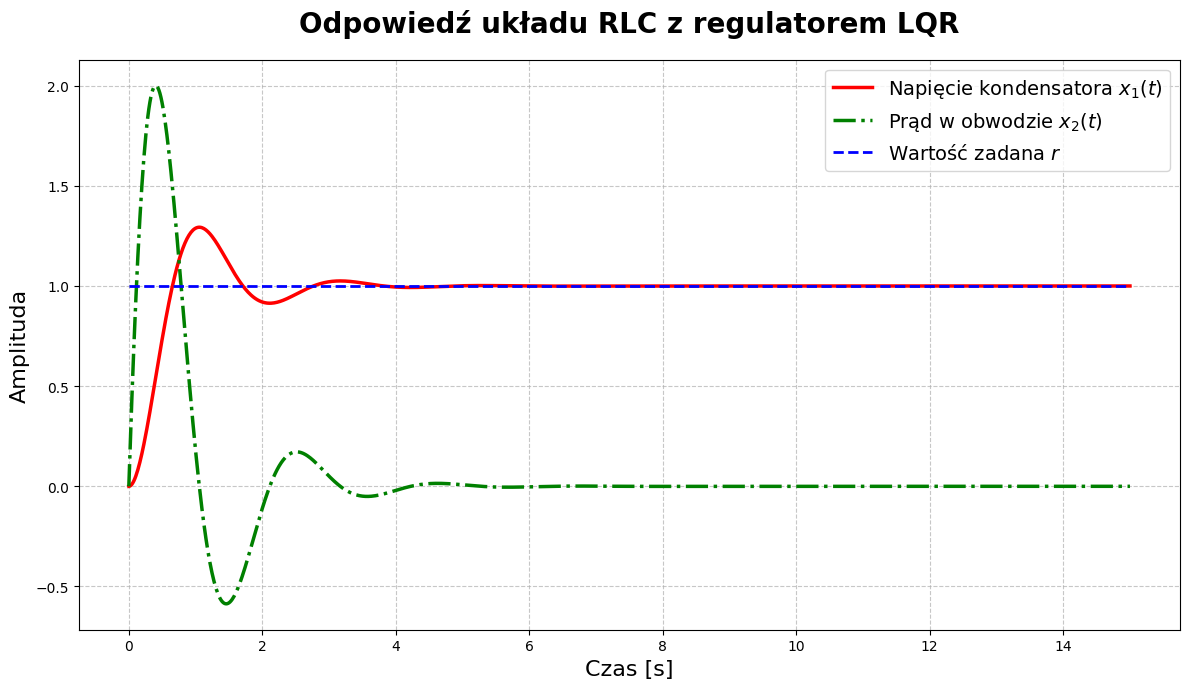

In [6]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are
import matplotlib.pyplot as plt

# 1. PARAMETRY UKŁADU RLC
R_val = 0.5
L_val = 0.5
C_val = 0.2

# Macierze stanu (zdefiniowane w poprzednim kroku)
A = np.array([[0, 1], [-1 / (L_val * C_val), -R_val / L_val]])
B = np.array([[0], [1 / L_val]])

# Macierze wag dla LQR
Q = np.array([[1, 0], [0, 1]])
R_weight = np.array([[1]])

# Obliczenie LQR (Macierz K)
P = solve_continuous_are(A, B, Q, R_weight)
K = np.linalg.inv(R_weight) @ B.T @ P

print(f"Wyznaczona macierz wzmocnienia K: {K}")

# Obliczenie wzmocnienia wstępnego N (pre-scaling)
# Jest to potrzebne, aby układ zamknięty podążał do wartości zadanej 1, a nie do 0.
# Wzór: N = -1 / (C_sys * (A - B*K)^-1 * B)
C_sys = np.array([1, 0]) # Chcemy sterować stanem x1 (ładunek/napięcie)
sys_cl = A - B @ K       # Macierz układu zamkniętego
inv_sys_cl = np.linalg.inv(sys_cl)
N_val = -1 / (C_sys @ inv_sys_cl @ B)
N = N_val[0]             # Konwersja z wektora na skalar

# 2. DEFINICJA MODELU Z LQR
def model_lqr(x, t, r, K, N):
    """
    x: wektor stanu [x1, x2]
    r: wartość zadana
    K: macierz wzmocnienia
    N: współczynnik skalowania wejścia
    """
    # Konwersja na wektor kolumnowy dla operacji macierzowych
    x_col = x.reshape(-1, 1)
    
    # Prawo sterowania: u = -K*x + N*r
    u = -K @ x_col + N * r
    
    # Równania stanu: dx/dt = Ax + Bu
    dxdt = A @ x_col + B @ u
    
    return dxdt.flatten()

# 3. SYMULACJA
t = np.linspace(0, 15, 1000) # Czas symulacji
x0 = [0, 0]                  # Warunki początkowe
r = 1.0                      # Wymuszenie skokowe (wartość zadana dla x1)

# Rozwiązanie ODE
sol = odeint(model_lqr, x0, t, args=(r, K, N))

# Wyciągnięcie zmiennych
y_x1 = sol[:, 0] # x1: Ładunek / Napięcie
y_x2 = sol[:, 1] # x2: Prąd

# 4. RYSOWANIE WYKRESU (STYL UŻYTKOWNIKA)
plt.figure(figsize=(12, 7))

# Wyjście układu - x1 (Napięcie)
plt.plot(t, y_x1, color='red', linewidth=2.5, label='Napięcie kondensatora $x_1(t)$')

# Dodatkowy przebieg - x2 (Prąd) - opcjonalnie, dla pełnego obrazu
plt.plot(t, y_x2, color='green', linewidth=2.5, linestyle='-.', label='Prąd w obwodzie $x_2(t)$')

# Wartość zadana
plt.plot(t, [r]*len(t), color='blue', linestyle='--', linewidth=2.0, label='Wartość zadana $r$')

plt.title(f'Odpowiedź układu RLC z regulatorem LQR', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Amplituda', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Dodanie wartości K na wykresie
# k_str = f"K = [{K[0,0]:.4f}, {K[0,1]:.4f}]"
# plt.text(0.02, 0.95, k_str, transform=plt.gca().transAxes, fontsize=14,
#          verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

------------------------------
Wyznaczona macierz wzmocnienia K:
[[0.09901951 0.66147299]]
------------------------------


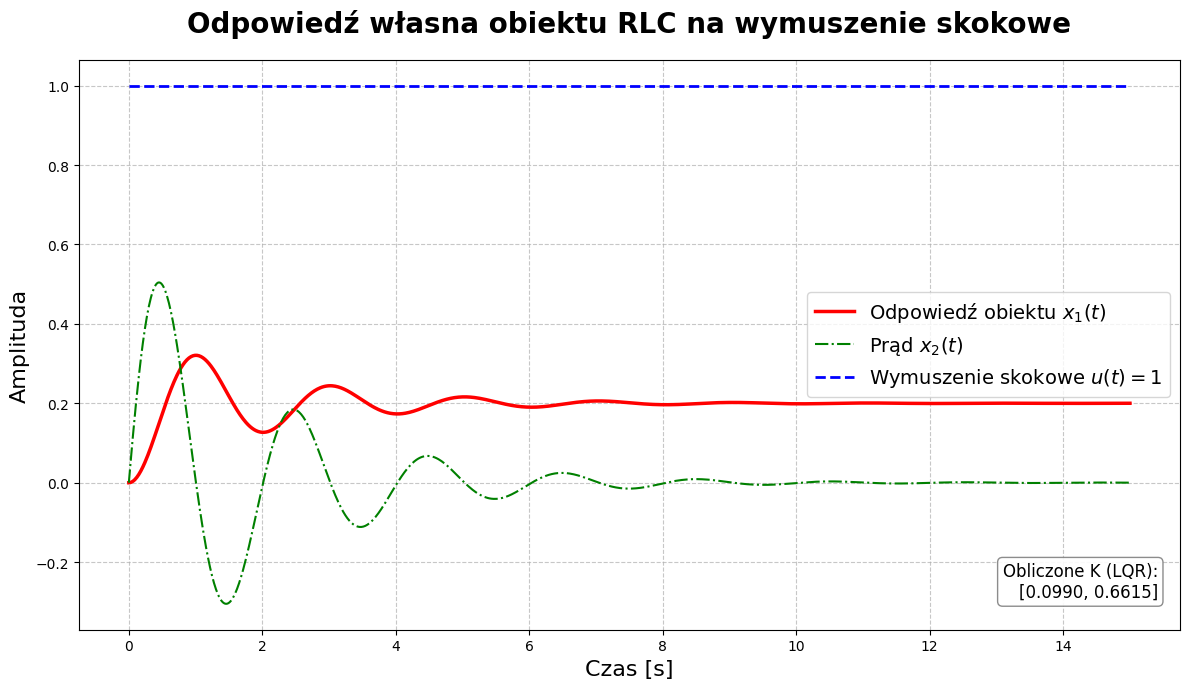

In [7]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are
import matplotlib.pyplot as plt

# --- 1. PARAMETRY I OBLICZENIA (LQR) ---
R_val = 0.5
L_val = 0.5
C_val = 0.2

# Macierze stanu
A = np.array([[0, 1], [-1 / (L_val * C_val), -R_val / L_val]])
B = np.array([[0], [1 / L_val]])

# Macierze wag (jednostkowe zgodnie z poleceniem)
Q = np.array([[1, 0], [0, 1]])
R_weight = np.array([[1]])

# Rozwiązanie równania Riccatiego i wyznaczenie K
P = solve_continuous_are(A, B, Q, R_weight)
K = np.linalg.inv(R_weight) @ B.T @ P

# WYPISANIE WYNIKU (Zgodnie z poleceniem "podać wartość K")
print(f"-"*30)
print(f"Wyznaczona macierz wzmocnienia K:\n{K}")
print(f"-"*30)

# --- 2. SYMULACJA ODPOWIEDZI OBIEKTU (OTWARTEGO) ---
# Polecenie: "Wykreślić odpowiedź obiektu RLC na wymuszenie skokowe"
# Interpretacja: Wymuszenie u(t) = 1 (skok napięcia na wejściu obwodu)

def model_open_loop(x, t):
    """
    Model samego obiektu RLC.
    u = 1 (skok jednostkowy)
    """
    u = 1.0 
    dxdt = A @ x + (B * u).flatten()
    return dxdt

t = np.linspace(0, 15, 1000)
x0 = [0, 0] # Warunki początkowe zerowe

sol = odeint(model_open_loop, x0, t)
y_x1 = sol[:, 0] # Ładunek / Napięcie (zależy od interpretacji x1)
y_x2 = sol[:, 1] # Prąd

# --- 3. WYKRES (Twój styl) ---
plt.figure(figsize=(12, 7))

# Rysujemy x1 (zwykle to jest główna zmienna wyjściowa - napięcie/ładunek)
plt.plot(t, y_x1, color='red', linewidth=2.5, label='Odpowiedź obiektu $x_1(t)$')
# Opcjonalnie x2 (prąd)
plt.plot(t, y_x2, color='green', linewidth=1.5, linestyle='-.', label='Prąd $x_2(t)$')

# Wymuszenie (dla odniesienia)
plt.plot(t, [1]*len(t), color='blue', linestyle='--', linewidth=2.0, label='Wymuszenie skokowe $u(t)=1$')

plt.title(f'Odpowiedź własna obiektu RLC na wymuszenie skokowe', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Amplituda', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Dodajemy informację o wyliczonym K na wykresie (żeby wszystko było na jednym obrazku)
k_info = f"Obliczone K (LQR):\n[{K[0,0]:.4f}, {K[0,1]:.4f}]"
plt.text(0.98, 0.05, k_info, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray'))

plt.tight_layout()
plt.show()

Wyznaczona macierz wzmocnienia K: [[0.09901951 0.66147299]]


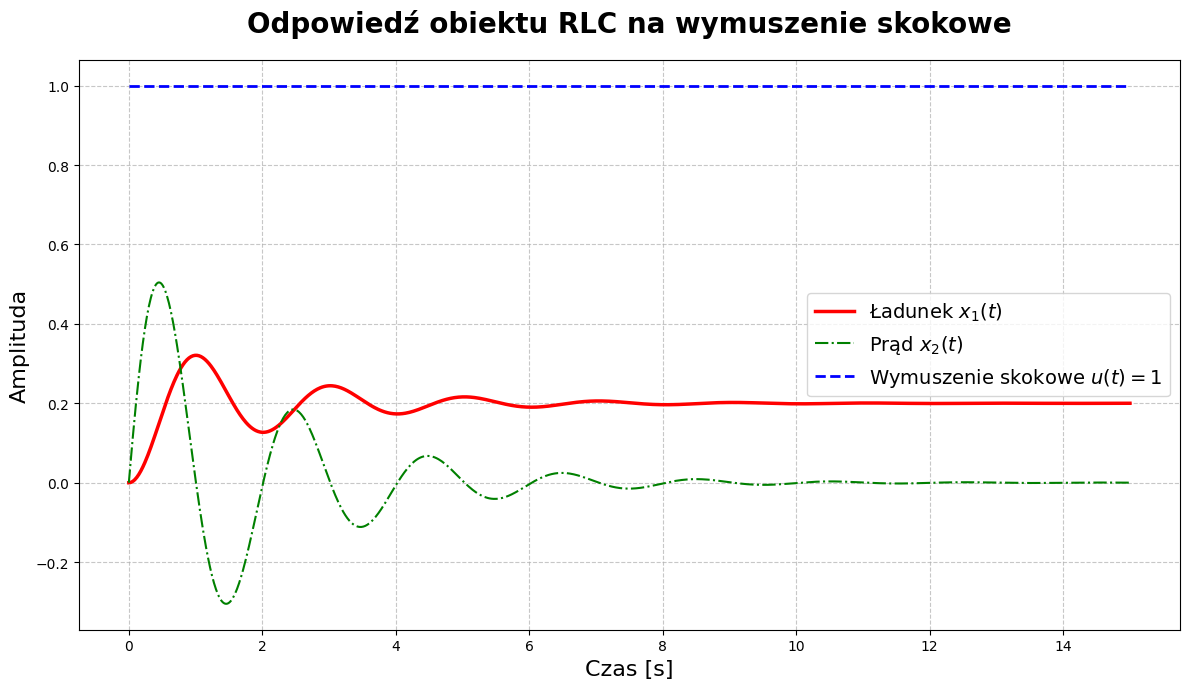

In [11]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are
import matplotlib.pyplot as plt

# 1. PARAMETRY I MACIERZE
R_val = 0.5
L_val = 0.5
C_val = 0.2

# Macierze stanu (zgodnie z Twoim wzorem)
# x1 = ładunek (q), x2 = prąd (i)
A = np.array([
    [0, 1], 
    [-1 / (L_val * C_val), -R_val / L_val]
])
B = np.array([
    [0], 
    [1 / L_val]
])

# Macierze wag (jednostkowe)
Q = np.array([[1, 0], [0, 1]])
R_weight = np.array([[1]])

# 2. OBLICZENIE WZMOCNIENIA K (LQR)
# Rozwiązanie równania Riccatiego
P = solve_continuous_are(A, B, Q, R_weight)
# Wyznaczenie wzmocnienia
K = np.linalg.inv(R_weight) @ B.T @ P

# Wypisanie wyniku w konsoli
print(f"Wyznaczona macierz wzmocnienia K: {K}")

# 3. SYMULACJA ODPOWIEDZI OBIEKTU (OTWARTEGO)
# Model bez regulatora, samo wymuszenie skokowe u=1
def model_open_loop(x, t):
    u = 1.0  # Skok jednostkowy napięcia
    # dxdt = Ax + Bu
    dxdt = A @ x + (B * u).flatten()
    return dxdt

t = np.linspace(0, 15, 1000)
x0 = [0, 0]  # Warunki początkowe

sol = odeint(model_open_loop, x0, t)
y_x1 = sol[:, 0]  # x1: Ładunek (ustali się na 0.2, bo q = C*u)
y_x2 = sol[:, 1]  # x2: Prąd

# 4. RYSOWANIE WYKRESU
plt.figure(figsize=(12, 7))

# Wykres x1 (czerwona linia ciągła)
plt.plot(t, y_x1, color='red', linewidth=2.5, label='Ładunek $x_1(t)$')

# Wykres x2 (zielona linia przerywana)
plt.plot(t, y_x2, color='green', linewidth=1.5, linestyle='-.', label='Prąd $x_2(t)$')

# Wykres wymuszenia (niebieska przerywana)
plt.plot(t, [1]*len(t), color='blue', linestyle='--', linewidth=2.0, label='Wymuszenie skokowe $u(t)=1$')

# Stylizacja
plt.title('Odpowiedź obiektu RLC na wymuszenie skokowe', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Amplituda', fontsize=16)
plt.legend(fontsize=14, loc='center right')
plt.grid(True, linestyle='--', alpha=0.7)

# Dodanie "dymka" z wartością K (zgodnie z Twoim obrazkiem w prawym dolnym rogu)
# k_text = f"Obliczone K (LQR):\n[{K[0,0]:.4f}, {K[0,1]:.4f}]"
# plt.text(0.98, 0.03, k_text, transform=plt.gca().transAxes, fontsize=12,
#          verticalalignment='bottom', horizontalalignment='right',
#          bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.9))

plt.tight_layout()
plt.show()

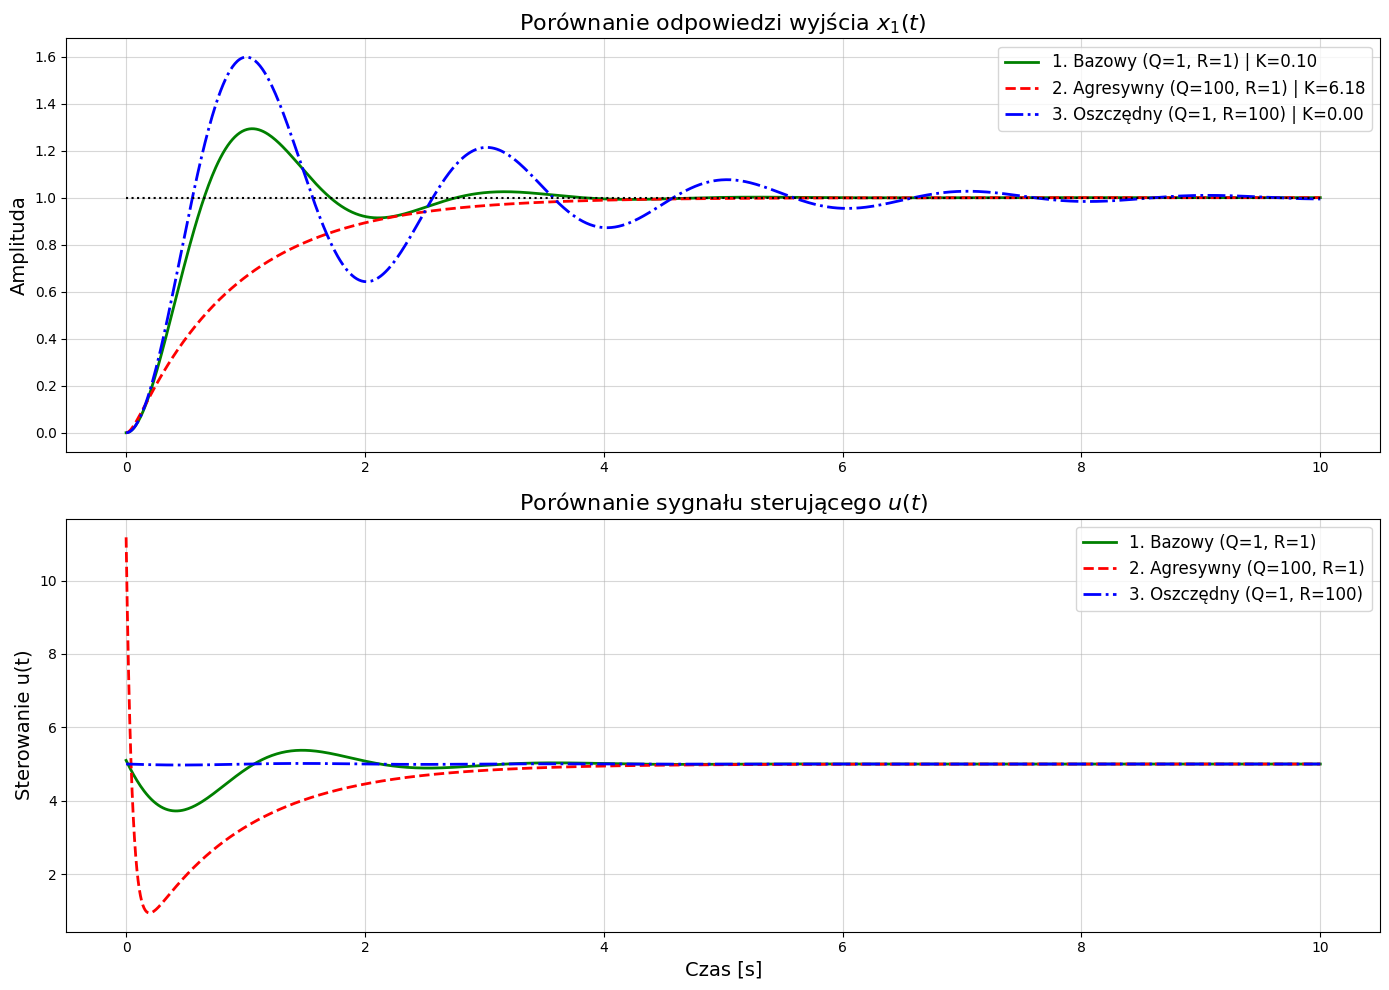

In [21]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are
import matplotlib.pyplot as plt

# --- PARAMETRY OBIEKTU RLC ---
R_circ = 0.5
L_circ = 0.5
C_circ = 0.2

A = np.array([[0, 1], [-1/(L_circ*C_circ), -R_circ/L_circ]])
B = np.array([[0], [1/L_circ]])

# Funkcja pomocnicza do obliczania K i N dla zadanych wag
def get_controller(Q_scale, R_scale):
    Q = np.eye(2) * Q_scale
    R = np.array([[R_scale]])
    
    # Rozwiązanie ARE
    P = solve_continuous_are(A, B, Q, R)
    K = np.linalg.inv(R) @ B.T @ P
    
    # Pre-scaling N
    # N = -1 / (C_out * (A - B*K)^-1 * B)
    sys_cl = A - B @ K
    N = -1.0 / (np.array([1, 0]) @ np.linalg.inv(sys_cl) @ B)
    return K, N[0]

# Funkcja modelu zamkniętego
def model_closed(x, t, K, N, r=1.0):
    x_col = x.reshape(-1, 1)
    u = -K @ x_col + N * r
    dxdt = A @ x_col + B @ u
    return dxdt.flatten()

# --- DEFINICJA PRZYPADKÓW ---
scenarios = [
    {"name": "1. Bazowy (Q=1, R=1)", "Q": 1, "R": 1, "style": "g-"},
    {"name": "2. Agresywny (Q=100, R=1)", "Q": 100, "R": 1, "style": "r--"},
    {"name": "3. Oszczędny (Q=1, R=100)", "Q": 1, "R": 100, "style": "b-."}
]

t = np.linspace(0, 10, 1000)
x0 = [0, 0]

plt.figure(figsize=(14, 10))

# Przygotowanie dwóch wykresów: Wyjście (góra) i Sterowanie (dół)
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

for s in scenarios:
    K, N = get_controller(s["Q"], s["R"])
    
    # Symulacja
    sol = odeint(model_closed, x0, t, args=(K, N))
    y = sol[:, 0] # Napięcie x1
    
    # Odtworzenie sygnału sterującego u(t) = -Kx + N*r
    # Musimy to policzyć krok po kroku dla wykresu
    u_sig = []
    for i in range(len(t)):
        x_inst = sol[i, :].reshape(-1, 1)
        u_val = -K @ x_inst + N * 1.0
        u_sig.append(u_val[0, 0])
    
    # Rysowanie
    ax1.plot(t, y, s["style"], linewidth=2, label=f'{s["name"]} | K={K[0,0]:.2f}')
    ax2.plot(t, u_sig, s["style"], linewidth=2, label=f'{s["name"]}')

# Kosmetyka wykresów
ax1.set_title("Porównanie odpowiedzi wyjścia $x_1(t)$", fontsize=16)
ax1.set_ylabel("Amplituda", fontsize=14)
ax1.grid(True, alpha=0.5)
ax1.legend(fontsize=12)
ax1.plot(t, [1]*len(t), 'k:', label='Cel')

ax2.set_title("Porównanie sygnału sterującego $u(t)$", fontsize=16)
ax2.set_xlabel("Czas [s]", fontsize=14)
ax2.set_ylabel("Sterowanie u(t)", fontsize=14)
ax2.grid(True, alpha=0.5)
ax2.legend(fontsize=12)

plt.tight_layout()
plt.show()

Wyznaczona macierz K: [[0.09901951 0.66147299]]


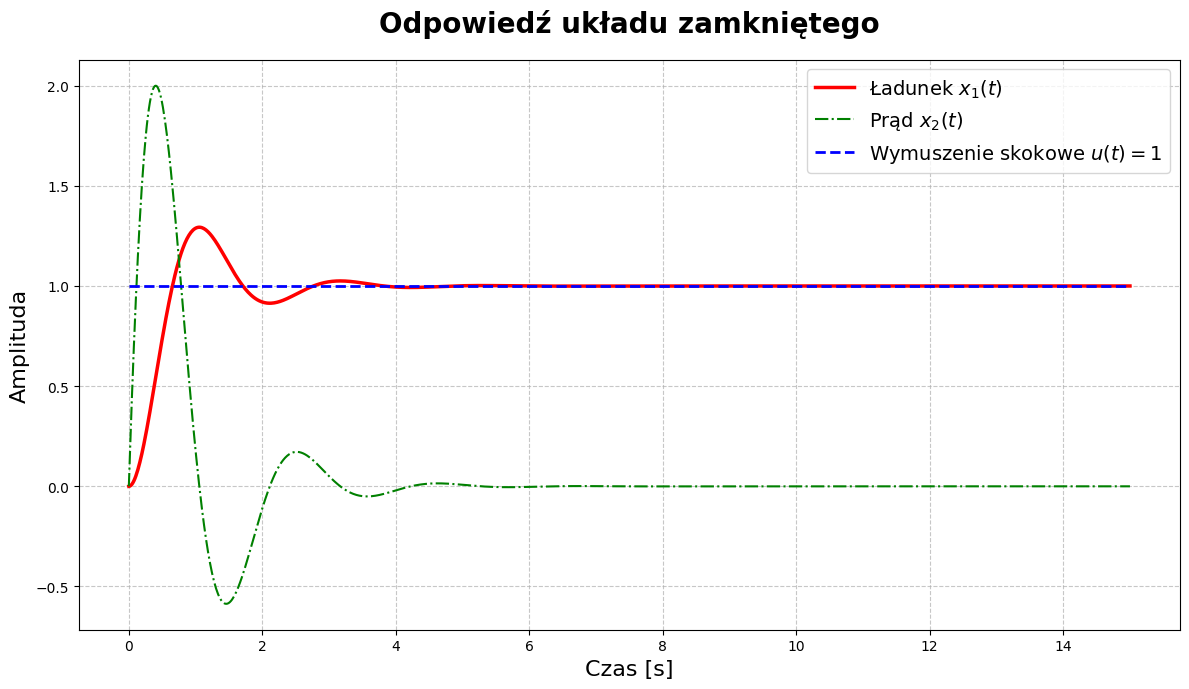

In [29]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are
import matplotlib.pyplot as plt

# 1. PARAMETRY UKŁADU
R_val = 0.5
L_val = 0.5
C_val = 0.2

# Macierze stanu A i B
A = np.array([[0, 1], [-1 / (L_val * C_val), -R_val / L_val]])
B = np.array([[0], [1 / L_val]])

# Macierze wag Q i R (jednostkowe)
Q = np.array([[1, 0], [0, 1]])
R_weight = np.array([[1]])

# 2. OBLICZENIE LQR (tylko K)
P = solve_continuous_are(A, B, Q, R_weight)
K = np.linalg.inv(R_weight) @ B.T @ P

# Wypisanie K (zgodnie z poleceniem)
print(f"Wyznaczona macierz K: {K}")

# 3. SYMULACJA UKŁADU ZAMKNIĘTEGO (Podejście z Instrukcji PDF)
# Cel: Stabilizacja w punkcie x_d = [q_d, 0]

def model_tracking(x, t, K, q_d):
    """
    Model układu zamkniętego realizujący śledzenie wartości zadanej q_d.
    Zgodnie z PDF: u = -u_e + u_c
    """
    # 1. Wartość zadana stanu x_d (ładunek q_d, prąd 0)
    x_d = np.array([q_d, 0])
    
    # 2. Obliczenie uchybu e = x_d - x (Rys. 2 w PDF)
    e = x_d - x
    e_col = e.reshape(-1, 1) # Wektor kolumnowy
    
    # 3. Wyznaczenie sterowania kompensacyjnego u_c (wzór 19 w PDF)
    # u_c = (1/C) * q_d
    u_c = (1 / C_val) * q_d
    
    # 4. Wyznaczenie sterowania dynamicznego u_e (LQR na błędzie)
    # Zgodnie z PDF u_e = -Ke, ale u = -u_e + u_c, co daje u = Ke + u_c
    # (Logika: jeśli błąd jest dodatni, musimy dodać napięcia, więc +K*e)
    u_dynamic = K @ e_col
    
    # Całkowite sterowanie u
    u = u_dynamic + u_c
    
    # Równania stanu obiektu: dx/dt = Ax + Bu
    x_col = x.reshape(-1, 1)
    dxdt = A @ x_col + B @ u
    
    return dxdt.flatten()

# Parametry symulacji
t = np.linspace(0, 15, 1000)
x0 = [0, 0]     # Warunki początkowe
q_d = 1.0       # Wartość zadana (ładunek = 1.0 -> co oznacza napięcie 5V, bo U=Q/C)
# Uwaga: Jeśli chcesz uzyskać na wyjściu NAPIĘCIE 1V, to q_d musi wynosić C * 1V = 0.2.
# Jeśli q_d = 1.0, to napięcie ustali się na 5V.
# Załóżmy, że sterujemy do q_d = 1.0 (zgodnie z logiką zmiennych stanu).

sol = odeint(model_tracking, x0, t, args=(K, q_d))
y_x1 = sol[:, 0] # Ładunek q
y_x2 = sol[:, 1] # Prąd i

# 4. WYKRES (Twój styl)
plt.figure(figsize=(12, 7))

# Wyjście układu (x1 - Ładunek)
plt.plot(t, y_x1, color='red', linewidth=2.5, label='Ładunek $x_1(t)$')

# Prąd (x2)
plt.plot(t, y_x2, color='green', linewidth=1.5, linestyle='-.', label='Prąd $x_2(t)$')

# Wartość zadana
plt.plot(t, [q_d]*len(t), color='blue', linestyle='--', linewidth=2.0, label=f'Wymuszenie skokowe $u(t)=1$')

plt.title('Odpowiedź układu zamkniętego', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Amplituda', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Informacja o K i metodzie
# info_text = (f"K (LQR) = [{K[0,0]:.4f}, {K[0,1]:.4f}]\n"
#              f"Kompensacja $u_c = q_d/C$")
# plt.text(0.98, 0.05, info_text, transform=plt.gca().transAxes, fontsize=12,
#          verticalalignment='bottom', horizontalalignment='right',
#          bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.9))

plt.tight_layout()
plt.show()

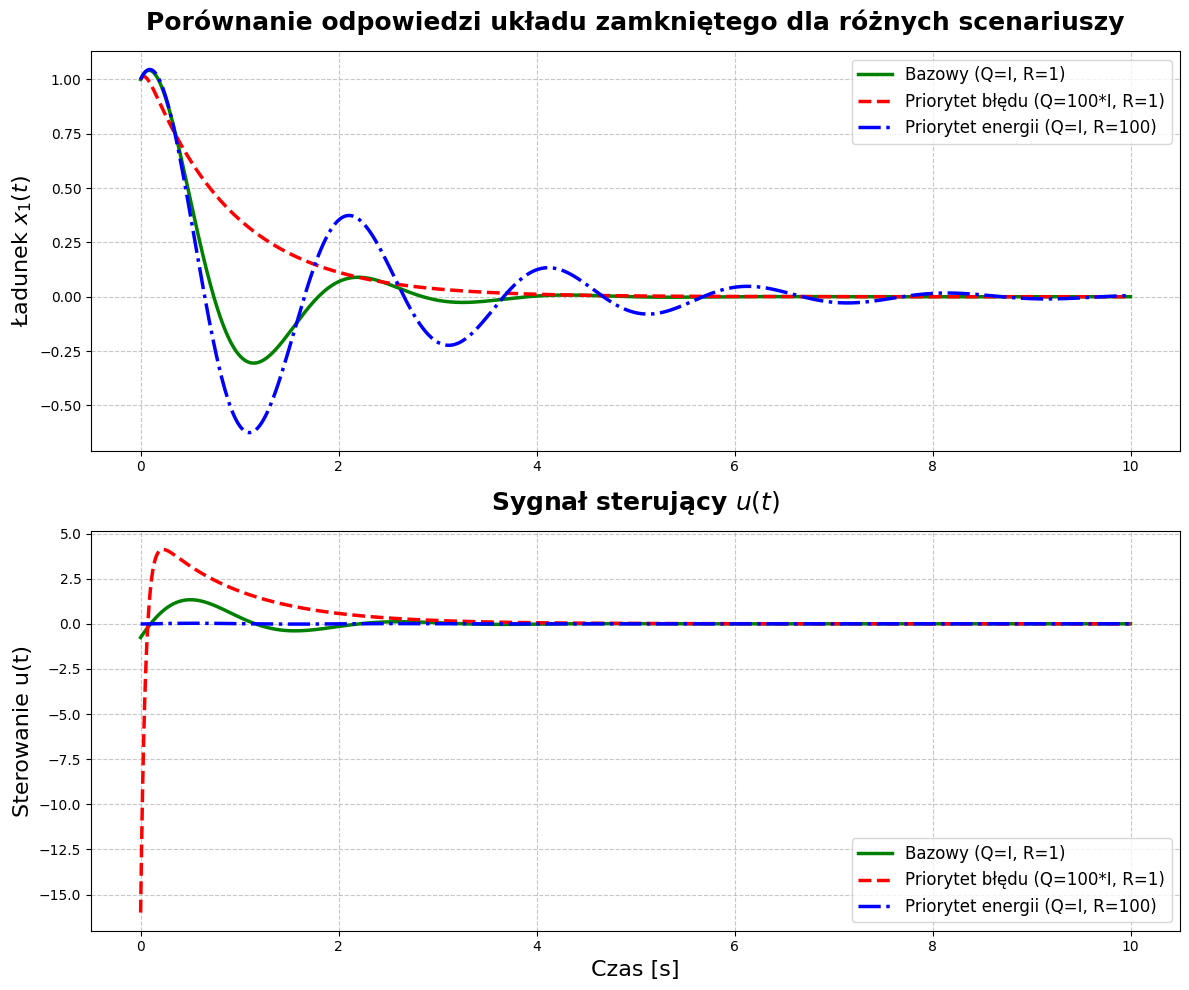

In [39]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are
import matplotlib.pyplot as plt

# 1. PARAMETRY UKŁADU (Twoje wartości)
R_val = 0.5
L_val = 0.5
C_val = 0.2

A = np.array([[0, 1], [-1 / (L_val * C_val), -R_val / L_val]])
B = np.array([[0], [1 / L_val]])

# 2. DEFINICJA SCENARIUSZY (Zgodnie z zadaniem 2.3)
scenarios = [
    {
        "name": "Bazowy (Q=I, R=1)", 
        "Q_factor": 1.0, 
        "R_factor": 1.0, 
        "color": "green", 
        "style": "-"
    },
    {
        "name": "Priorytet błędu (Q=100*I, R=1)", 
        "Q_factor": 100.0, 
        "R_factor": 1.0, 
        "color": "red", 
        "style": "--"
    },
    {
        "name": "Priorytet energii (Q=I, R=100)", 
        "Q_factor": 1.0, 
        "R_factor": 100.0, 
        "color": "blue", 
        "style": "-."
    }
]

# Funkcja pomocnicza do LQR
def get_K(q_factor, r_factor):
    Q = np.eye(2) * q_factor
    R = np.array([[r_factor]])
    P = solve_continuous_are(A, B, Q, R)
    K = np.linalg.inv(R) @ B.T @ P
    return K

# Model układu zamkniętego (stabilizacja w zerze)
# u = -Kx
def model_stabilization(x, t, K):
    x_col = x.reshape(-1, 1)
    u = -K @ x_col
    dxdt = A @ x_col + B @ u
    return dxdt.flatten()

# 3. SYMULACJA
t = np.linspace(0, 10, 1000)
# Zadane warunki początkowe: x(0)=1, x_dot(0)=1
x0 = [1.0, 1.0] 

results = []

for s in scenarios:
    K = get_K(s["Q_factor"], s["R_factor"])
    
    sol = odeint(model_stabilization, x0, t, args=(K,))
    
    # Odtwarzanie sterowania u(t) = -Kx
    u_sig = []
    for i in range(len(t)):
        x_inst = sol[i, :].reshape(-1, 1)
        u_val = -K @ x_inst
        u_sig.append(u_val[0,0])
        
    results.append({
        "time": t,
        "x1": sol[:, 0],
        "u": u_sig,
        "info": s
    })

# 4. RYSOWANIE
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Wykres 1: Stan x1 (Ładunek)
for res in results:
    s = res["info"]
    ax1.plot(res["time"], res["x1"], color=s["color"], linestyle=s["style"], linewidth=2.5, label=s["name"])

ax1.set_title('Porównanie odpowiedzi układu zamkniętego dla różnych scenariuszy', fontsize=18, fontweight='bold', pad=15)
ax1.set_ylabel('Ładunek $x_1(t)$', fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc="best")
ax1.legend(fontsize=12)
# Linia zerowa (cel)
# ax1.axhline(0, color='black', linewidth=1)

# Wykres 2: Sterowanie u
for res in results:
    s = res["info"]
    ax2.plot(res["time"], res["u"], color=s["color"], linestyle=s["style"], linewidth=2.5, label=s["name"])

ax2.set_title('Sygnał sterujący $u(t)$', fontsize=18, fontweight='bold', pad=15)
ax2.set_xlabel('Czas [s]', fontsize=16)
ax2.set_ylabel('Sterowanie u(t)', fontsize=16)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc="lower right", fontsize=12)

plt.tight_layout()
plt.show()

# ZADANIE 3


[[ 1.          0.          0.          1.        ]
 [ 1.00720694 -0.04386271 -0.04386271  0.97536906]
 [ 1.01861503 -0.0854383  -0.0854383   0.95150041]
 ...
 [ 3.42239602  0.0495221   0.0495221   0.33073834]
 [ 3.42239477  0.04952197  0.04952197  0.33073842]
 [ 3.42239353  0.04952183  0.04952183  0.33073849]]


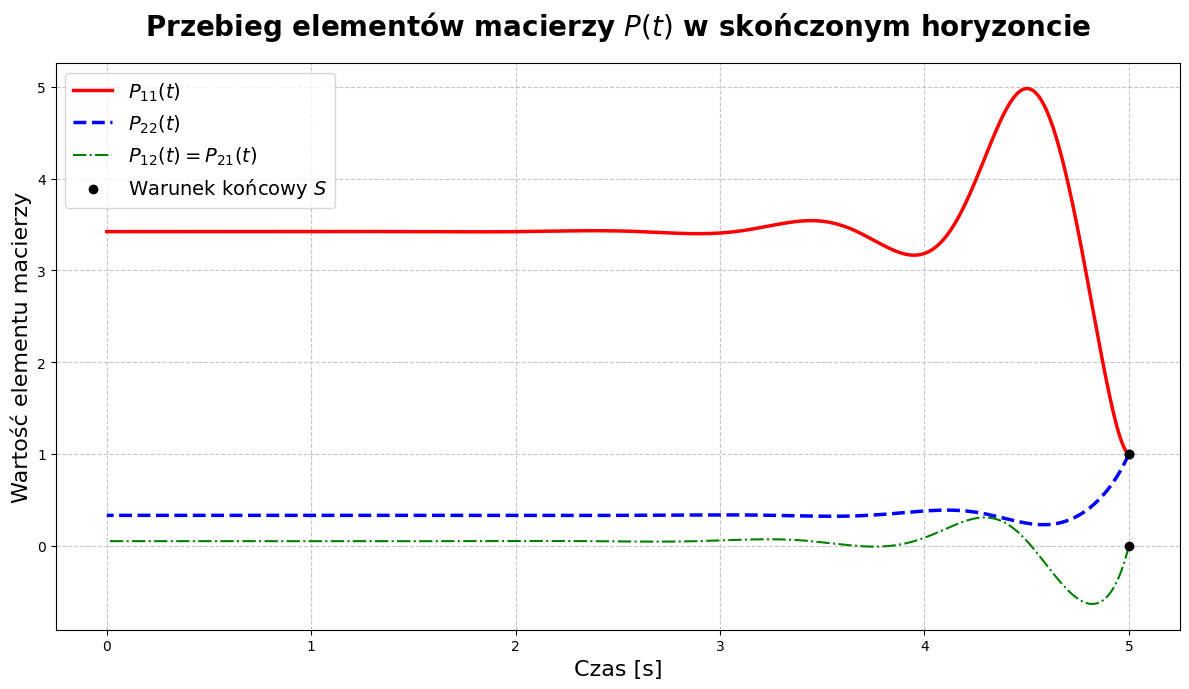

In [42]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 1. PARAMETRY UKŁADU
R_val = 0.5
L_val = 0.5
C_val = 0.2

A = np.array([[0, 1], [-1 / (L_val * C_val), -R_val / L_val]])
B = np.array([[0], [1 / L_val]])

# Macierze wag (zgodnie z instrukcją do zadania 3.2)
Q = np.eye(2)       # Macierz jednostkowa I2 [cite: 65]
R_mat = np.array([[1]]) # Waga sterowania R=1
S = np.eye(2)       # Warunek końcowy P(t1) = S [cite: 109, 116]

# 2. DEFINICJA FUNKCJI RICCATI (ZADANIE 3.1)
def riccati(p, t):
    """
    Implementacja różniczkowego równania Riccatiego (10).
    Równanie: P*A - P*B*inv(R)*B.T*P + A.T*P + Q = -dP/dt
    Stąd: dP/dt = -(P*A - P*B*inv(R)*B.T*P + A.T*P + Q)
    """
    # Konwersja wektora p na macierz 2x2 [cite: 113]
    P_mat = p.reshape(2, 2)
    
    # Wyznaczenie pochodnej
    R_inv = np.linalg.inv(R_mat)
    
    # Człon kwadratowy: P * B * inv(R) * B.T * P
    term_quad = P_mat @ B @ R_inv @ B.T @ P_mat
    
    # Obliczenie prawej strony równania (z minusem, bo w PDF jest = -P_dot) [cite: 105]
    dP_dt = -(P_mat @ A - term_quad + A.T @ P_mat + Q)
    
    # Spłaszczenie do listy/wektora dla odeint [cite: 114]
    return dP_dt.flatten()

# 3. SYMULACJA (ZADANIE 3.2)
# Warunek początkowy dla całkowania (czyli warunek końcowy problemu)
P0 = S.flatten() 

# Odwrócony wektor czasu t = t1, ..., 0 
t1 = 5.0
t_inv = np.linspace(t1, 0, 1000)

# Rozwiązanie ODE
ric_sol = odeint(riccati, P0, t_inv)

print(ric_sol)

# 4. RYSOWANIE (Twój styl)
plt.figure(figsize=(12, 7))

# Wykresy elementów macierzy P
# P jest symetryczna, więc p_12 (indeks 1) i p_21 (indeks 2) powinny się pokrywać
plt.plot(t_inv, ric_sol[:, 0], color='red', linewidth=2.5, label='$P_{11}(t)$')
plt.plot(t_inv, ric_sol[:, 3], color='blue', linewidth=2.5, linestyle='--', label='$P_{22}(t)$')
plt.plot(t_inv, ric_sol[:, 1], color='green', linewidth=1.5, linestyle='-.', label='$P_{12}(t) = P_{21}(t)$')

# Zaznaczenie wartości zadanej S na końcu czasu (t=5)
plt.scatter([5]*3, [1, 1, 0], color='black', zorder=5, label='Warunek końcowy $S$')

plt.title('Przebieg elementów macierzy $P(t)$ w skończonym horyzoncie', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Wartość elementu macierzy', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Odwrócenie osi X nie jest konieczne, ale czasem pomaga w interpretacji "dochodzenia" do S
# Tutaj zostawiamy standardowo, widać że w t=5 wartości osiągają S.

plt.tight_layout()
plt.show()

<>:75: SyntaxWarning: invalid escape sequence '\c'
<>:75: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-3697107328.py:75: SyntaxWarning: invalid escape sequence '\c'
  s_name = "I" if j == 0 else "100 \cdot I"


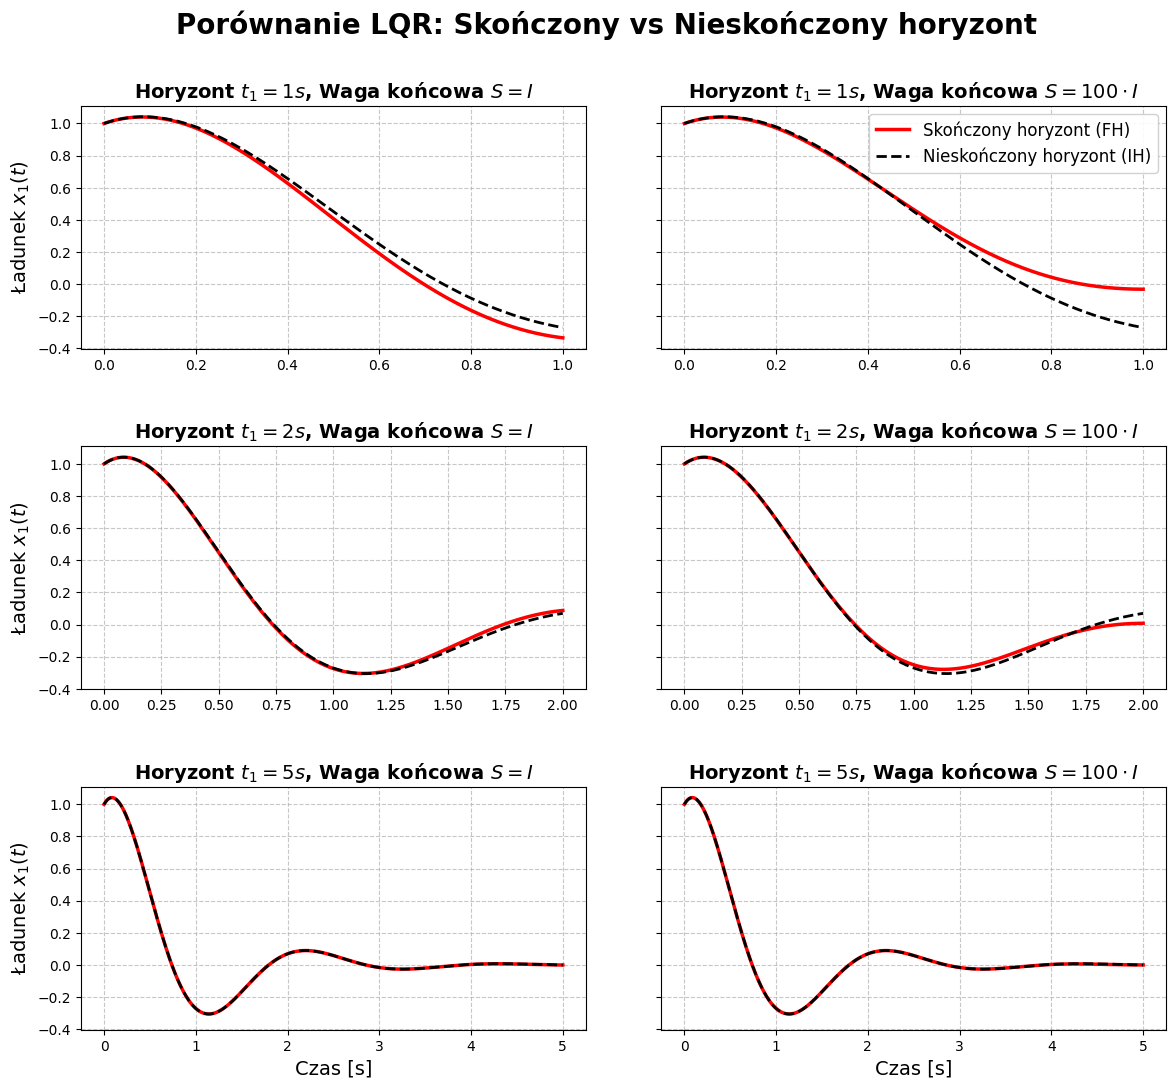

In [48]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# --- 1. PARAMETRY UKŁADU ---
R_val = 0.5
L_val = 0.5
C_val = 0.2
x0 = [1.0, 1.0] # Warunki początkowe

A = np.array([[0, 1], [-1 / (L_val * C_val), -R_val / L_val]])
B = np.array([[0], [1 / L_val]])

# Parametry LQR
Q = np.eye(2)
R_weight = np.array([[1]])

# Zestawy do porównania
S_values = [np.eye(2), 100 * np.eye(2)]
t1_values = [1, 2, 5]

# --- FUNKCJE POMOCNICZE ---
def riccati_diff(p, t):
    """Równanie różniczkowe Riccatiego (wstecz)"""
    P_mat = p.reshape(2, 2)
    R_inv = np.linalg.inv(R_weight)
    dP_dt = -(A.T @ P_mat + P_mat @ A - P_mat @ B @ R_inv @ B.T @ P_mat + Q)
    return dP_dt.flatten()

def get_infinite_horizon(t_eval):
    """LQR Nieskończony horyzont (odniesienie)"""
    P_inf = solve_continuous_are(A, B, Q, R_weight)
    K_inf = np.linalg.inv(R_weight) @ B.T @ P_inf
    def model(x, t):
        return (A - B @ K_inf) @ x
    return odeint(model, x0, t_eval)[:, 0]

def get_finite_horizon(t_end, S_mat):
    """LQR Skończony horyzont"""
    # 1. Rozwiązanie P(t) wstecz
    t_back = np.linspace(t_end, 0, 500)
    P_back = odeint(riccati_diff, S_mat.flatten(), t_back)
    
    # Dodano fill_value="extrapolate" dla bezpieczeństwa numerycznego
    P_interp = interp1d(t_back, P_back, axis=0, kind='cubic', fill_value="extrapolate")
    
    # 2. Symulacja w przód
    def model(x, t):
        P_t = P_interp(t).reshape(2, 2)
        K_t = np.linalg.inv(R_weight) @ B.T @ P_t
        return (A - B @ K_t) @ x
    
    t_fwd = np.linspace(0, t_end, 500)
    return t_fwd, odeint(model, x0, t_fwd)[:, 0]

# --- GENEROWANIE WYKRESU (STYL UŻYTKOWNIKA) ---
fig, axes = plt.subplots(len(t1_values), len(S_values), figsize=(14, 12), sharex=False, sharey=True)
plt.subplots_adjust(hspace=0.4, wspace=0.15)

for i, t1 in enumerate(t1_values):
    t_ref = np.linspace(0, t1, 500)
    y_inf = get_infinite_horizon(t_ref)
    
    for j, S_mat in enumerate(S_values):
        ax = axes[i, j]
        t_fin, y_fin = get_finite_horizon(t1, S_mat)
        
        # Styl linii
        ax.plot(t_fin, y_fin, color='red', linewidth=2.5, label='Skończony horyzont (FH)')
        ax.plot(t_ref, y_inf, color='black', linestyle='--', linewidth=2.0, label='Nieskończony horyzont (IH)')
        
        # Tytuły i siatka
        s_name = "I" if j == 0 else "100 \cdot I"
        ax.set_title(f"Horyzont $t_1={t1}s$, Waga końcowa $S={s_name}$", fontsize=14, fontweight='bold')
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Opisy osi
        if i == len(t1_values)-1: 
            ax.set_xlabel("Czas [s]", fontsize=14)
        if j == 0: 
            ax.set_ylabel("Ładunek $x_1(t)$", fontsize=14)
            
        # Legenda (tylko na jednym wykresie, żeby nie śmiecić)
        if i == 0 and j == 1: 
            ax.legend(loc='upper right', fontsize=12, framealpha=0.9)

plt.suptitle("Porównanie LQR: Skończony vs Nieskończony horyzont", fontsize=20, fontweight='bold', y=0.96)
plt.savefig("lqr_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

## Zadanie 4


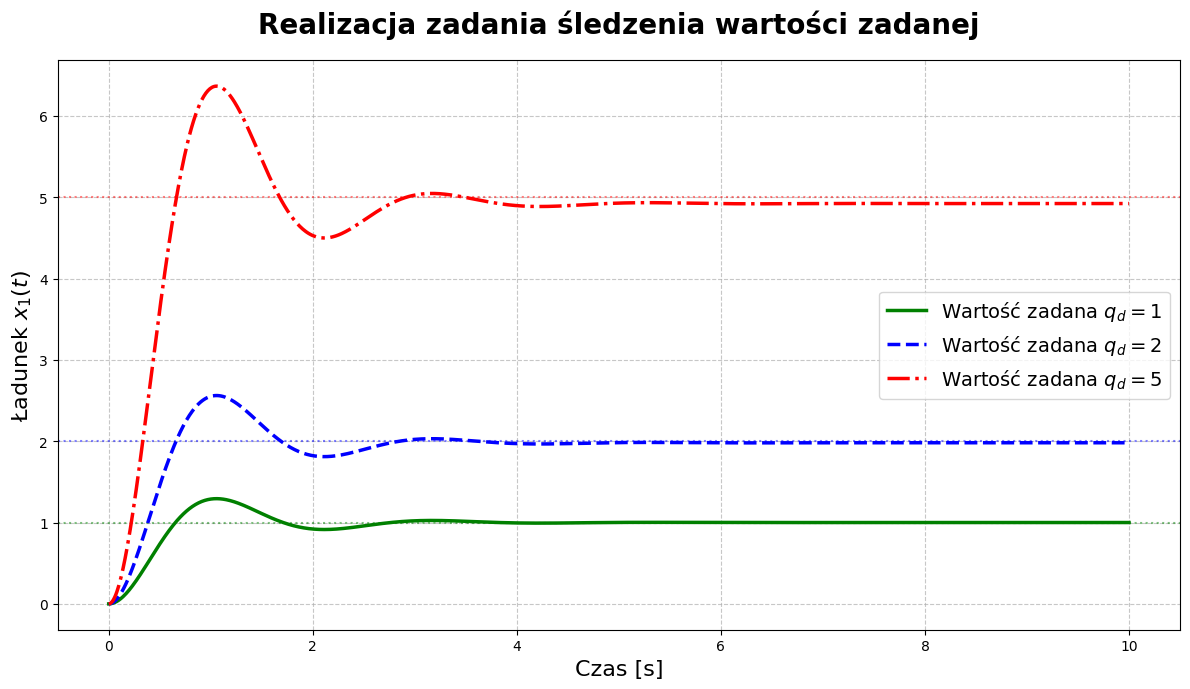

In [57]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are
import matplotlib.pyplot as plt

R_val = 0.5
L_val = 0.5
C_val = 0.2

A = np.array([[0, 1], [-1 / (L_val * C_val), -R_val / L_val]])
B = np.array([[0], [1 / L_val]])

Q = np.eye(2)
R = np.array([[1]]) 

# Rozwiązanie równania Riccatiego i obliczenie K
P = solve_continuous_are(A, B, Q, R)
K = np.linalg.inv(R) @ B.T @ P

def model(x, t, K, qd):
    x_d = np.array([q_d, 0])
    
    e = x_d - x
    
    u_c = (1 / C_val) * qd
    
    u = K @ e + u_c
    
    dxdt = A @ x + B.flatten() * u[0]
    
    return dxdt

t = np.linspace(0, 10, 1000)
x0 = np.array([0, 0])            
qd_values = [1, 2, 5]

plt.figure(figsize=(12, 7))

colors = ['green', 'blue', 'red']
styles = ['-', '--', '-.']

for i, q_target in enumerate(q_d_values):
    sol = odeint(model, x0, t, args=(K, q_target))
    y_signal = sol[:, 0] # Ładunek q_c
    
    # Rysowanie przebiegu
    plt.plot(t, y_signal, color=colors[i], linestyle=styles[i], linewidth=2.5, 
             label=f'Wartość zadana $q_d = {q_target}$')
    
    # Opcjonalnie: Rysowanie linii poziomej celu (dla czytelności)
    plt.axhline(q_target, color=colors[i], linestyle=':', alpha=0.5)

plt.title('Realizacja zadania śledzenia wartości zadanej', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Ładunek $x_1(t)$', fontsize=16)

plt.legend(fontsize=14, loc='center right')
plt.grid(True, linestyle='--', alpha=0.7)

# Dodatkowa informacja o metodzie

plt.tight_layout()
plt.show()

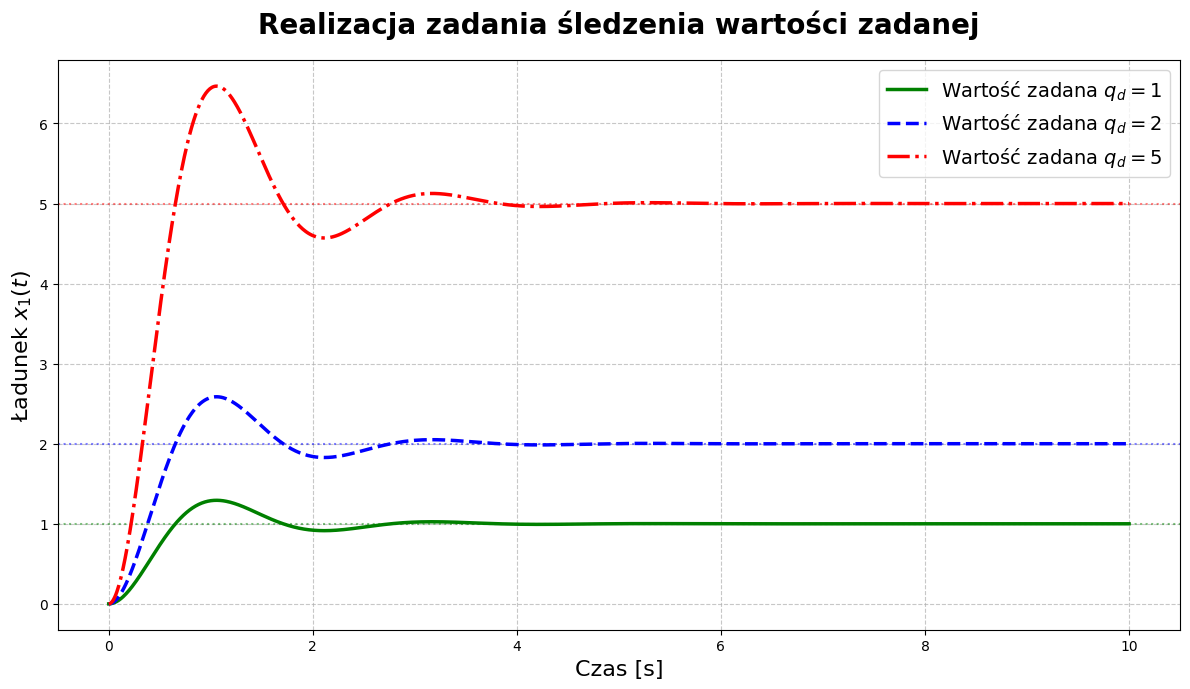

In [63]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are
import matplotlib.pyplot as plt

R_val = 0.5
L_val = 0.5
C_val = 0.2

A = np.array([[0, 1], [-1 / (L_val * C_val), -R_val / L_val]])
B = np.array([[0], [1 / L_val]])
Q = np.eye(2)
R = np.array([[1]])
P = solve_continuous_are(A, B, Q, R)
K = np.linalg.inv(R) @ B.T @ P

def model(x, t, K, q_t):
    x_t = np.array([q_t, 0])
    e = x_t - x
    u_c = q_t / C_val
    u = K @ e + u_c
    dxdt = A @ x + B.flatten() * u[0]
    return dxdt

t = np.linspace(0, 10, 1000)
x0 = np.array([0, 0])

sol1 = odeint(model, x0, t, args=(K, 1))
sol2 = odeint(model, x0, t, args=(K, 2))
sol3 = odeint(model, x0, t, args=(K, 5))

plt.figure(figsize=(12, 7))
plt.plot(t, sol1[:, 0], 'g-', linewidth=2.5, label=r'Wartość zadana $q_d = 1$')
plt.axhline(1, color='g', linestyle=':', alpha=0.5)
plt.plot(t, sol2[:, 0], 'b--', linewidth=2.5, label=r'Wartość zadana $q_d = 2$')
plt.axhline(2, color='b', linestyle=':', alpha=0.5)
plt.plot(t, sol3[:, 0], 'r-.', linewidth=2.5, label=r'Wartość zadana $q_d = 5$')
plt.axhline(5, color='r', linestyle=':', alpha=0.5)
plt.title('Realizacja zadania śledzenia wartości zadanej', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Ładunek $x_1(t)$', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()